# Data Analysis and Data Science - Task 1
### Student Performance Dataset Analysis using Python
---

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('student-mat.csv',sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Data Exploration

In [7]:
# Check missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
# Display data types
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [9]:
# Dataset shape
df.shape

(395, 33)

## Data Cleaning

In [10]:
# Drop duplicates
df_cleaned = df.drop_duplicates()

# Confirm cleanup
df_cleaned.shape

(395, 33)

## Data Analysis Questions

In [11]:
# 1. Average Final Grade
avg_g3 = df_cleaned['G3'].mean()
avg_g3

np.float64(10.415189873417722)

In [12]:
# 2. Students scoring above 15 in G3
above_15 = df_cleaned[df_cleaned['G3'] > 15]
count_above_15 = above_15.shape[0]
count_above_15

40

In [13]:
# 3. Correlation between study time and final grade
import numpy as np
correlation = np.corrcoef(df_cleaned['studytime'], df_cleaned['G3'])[0,1]
correlation

np.float64(0.09781968965319626)

In [14]:
# 4. Average G3 by gender
gender_avg = df.groupby('sex')['G3'].mean()
print("Average G3 by Gender:\n", gender_avg)

Average G3 by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


## Visualizations

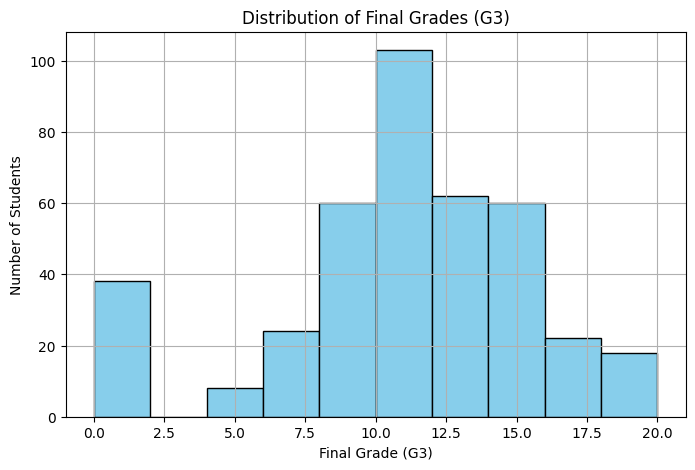

In [18]:
# Histogram of G3
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()

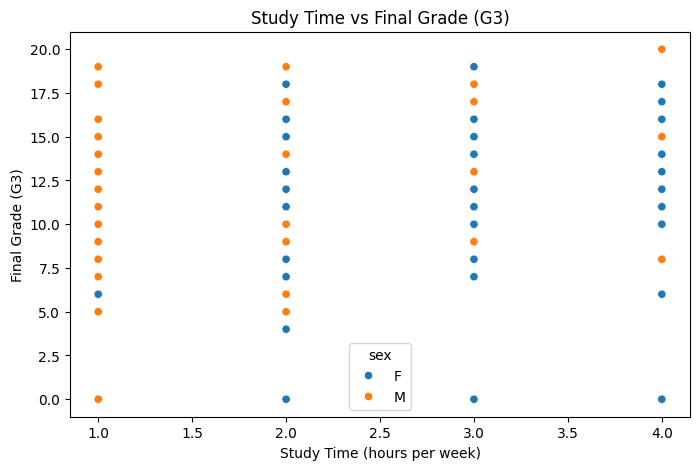

In [19]:
# Scatter plot: Study time vs G3
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='studytime', y='G3', hue='sex')
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Final Grade (G3)')
plt.show()

C:\Users\aasth\AppData\Local\Temp\ipykernel_18568\2813031075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_avg.index, y=gender_avg.values, palette='pastel')


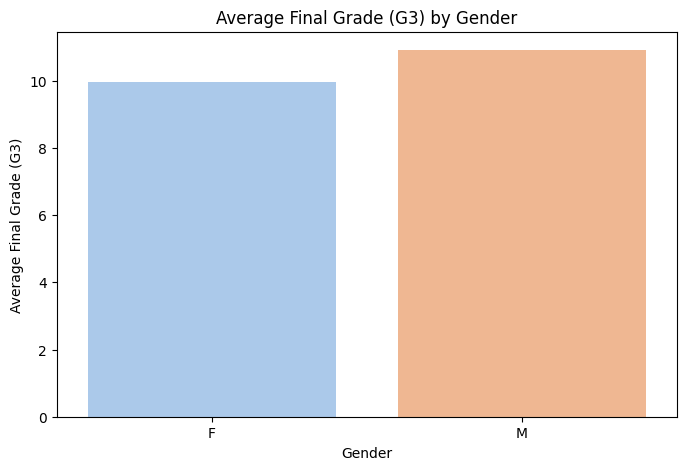

In [20]:
# Bar chart: Average G3 by gender
plt.figure(figsize=(8,5))
sns.barplot(x=gender_avg.index, y=gender_avg.values, palette='pastel')
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()